In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calg = pd.read_csv(r'E:\Projects\Data\Air quality\Calgary Air Quality.csv')

In [3]:
calg

,Station Name,Date,Method,Parameter,Average Daily Value,Units,Location,Count,ID
0,Calgary Southeast,2019/08/02,Calibrated with Methane/Propane,Methane,1.9609,ppm,"(50.955122, -113.969742)",1,2019-08-02-Calgary Southeast-Methane-1.9609
1,Calgary Southeast,2018/10/01,Instrumental,Methane,2.0783,ppm,"(50.955122, -113.969742)",1,2018-10-01-Calgary Southeast-Methane-2.0783
2,Calgary Central-Inglewood,2019/09/18,Instrumental,Nitrogen Dioxide,0.0000,mg/l,"(51.029944, -114.008111)",1,2019-09-18-Calgary Central-Inglewood-Nitrogen ...
3,Calgary Central-Inglewood,2019/09/18,Instrumental,Non-methane Hydrocarbons,0.0000,ppm,"(51.029944, -114.008111)",1,2019-09-18-Calgary Central-Inglewood-Non-metha...
4,Calgary Southeast,2019/09/12,Instrumental,Total Oxides Of Nitrogen,0.0000,ppm,"(50.955122, -113.969742)",1,2019-09-12-Calgary Southeast-Total Oxides Of N...
...,...,...,...,...,...,...,...,...,...
422923,Calgary East,1980/09/05,Instrumental,Nitrogen Dioxide,0.0154,ppm,"(51.009444, -114.025278)",1,1980-09-05-Calgary East-Nitrogen Dioxide-0.0154
422924,Calgary East,1982/01/09,Instrumental,Nitric Oxide,0.0037,ppm,"(51.009444, -114.025278)",1,1982-01-09-Calgary East-Nitric Oxide-0.0037
422925,Calgary East,1980/07/08,Instrumental,Carbon Monoxide,1.0833,ppm,"(51.009444, -114.025278)",1,1980-07-08-Calgary East-Carbon Monoxide-1.0833
422926,Calgary East,1980/04/04,Instrumental,Wind Speed,18.3000,km/hr 10m,"(51.009444, -114.025278)",1,1980-04-04-Calgary East-Wind Speed-18.3


#### Drop unnecessary columns (Method, Count)

In [5]:
calg.drop('Method',axis = 1, inplace = True)

In [6]:
calg.drop('Count',axis = 1, inplace = True)

In [7]:
calg.drop('ID',axis = 1, inplace = True)

#### Clean Location column of brackets

In [9]:
calg['Location'] = calg['Location'].str.replace('(','')

In [10]:
calg['Location'] = calg['Location'].str.replace(')','')

#### Change datatypes to relevant ones

In [12]:
calg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422928 entries, 0 to 422927
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Station Name         422928 non-null  object 
 1   Date                 422928 non-null  object 
 2   Parameter            422928 non-null  object 
 3   Average Daily Value  422928 non-null  float64
 4   Units                404761 non-null  object 
 5   Location             422928 non-null  object 
dtypes: float64(1), object(5)
memory usage: 19.4+ MB


In [13]:
# Changing date to datetime format
calg['Date'] = pd.to_datetime(calg['Date'])

In [14]:
calg['Year'] = pd.DatetimeIndex(calg['Date']).year

In [15]:
calg['Month'] = calg['Date'].dt.month_name(locale = 'English')

In [16]:
calg['Day'] = calg['Date'].dt.day_name(locale = 'English')

In [17]:
calg['Average Daily Value'] = calg['Average Daily Value'].round(2)

In [18]:
calg['Day of Month'] = pd.DatetimeIndex(calg['Date']).day

In [19]:
calg['Station Name'].unique()

array(['Calgary Southeast', 'Calgary Central-Inglewood',
       'Calgary Northwest', 'Calgary East', 'Calgary Central',
       'Calgary Central 2'], dtype=object)

In [20]:
# Sorting values according to Station Name, Date and then Parameter.
calg.sort_values(['Station Name','Date','Parameter'], inplace = True, ascending = [False,True,True])

In [21]:
calg.reset_index(inplace = True, drop = True)

In [22]:
calg.loc[calg['Parameter'] == 'Air Quality Index', 'Units'] = 'index'

In [23]:
calg[calg['Parameter'] == 'Air Quality Index']

,Station Name,Date,Parameter,Average Daily Value,Units,Location,Year,Month,Day,Day of Month
0,Calgary Southeast,2014-04-01,Air Quality Index,0.00,index,"50.955122, -113.969742",2014,April,Tuesday,1
1,Calgary Southeast,2014-04-02,Air Quality Index,0.00,index,"50.955122, -113.969742",2014,April,Wednesday,2
2,Calgary Southeast,2014-04-03,Air Quality Index,0.00,index,"50.955122, -113.969742",2014,April,Thursday,3
3,Calgary Southeast,2014-04-04,Air Quality Index,0.00,index,"50.955122, -113.969742",2014,April,Friday,4
4,Calgary Southeast,2014-04-05,Air Quality Index,0.00,index,"50.955122, -113.969742",2014,April,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
422880,Calgary Central,2008-02-09,Air Quality Index,8.11,index,"51.0471506, -114.0731477",2008,February,Saturday,9
422889,Calgary Central,2008-02-10,Air Quality Index,10.00,index,"51.0471506, -114.0731477",2008,February,Sunday,10
422898,Calgary Central,2008-02-11,Air Quality Index,11.82,index,"51.0471506, -114.0731477",2008,February,Monday,11
422906,Calgary Central,2008-02-12,Air Quality Index,11.27,index,"51.0471506, -114.0731477",2008,February,Tuesday,12


### Reading in data from 2021 to 2025. Data from 2019 Sept to 2020 Sept is missing. (COVID?)

In [25]:
calg21 = pd.read_csv(r'E:\Projects\Data\Air quality\Calgary Air Quality 2021 - 2025.csv')

### There were a lot of feature name changes and value changes in the latest dataset. Which meant we had to preprocess this dataset quite a bit.

In [27]:
calg21['Parameter'].unique()

array(['Outdoor Temperature', 'Wind Speed', 'Sulphur Dioxide', 'Methane',
       'Carbon Monoxide', 'Total Hydrocarbons', 'Ozone', 'Wind Direction',
       'Relative Humidity', 'Air Quality Health Index',
       'Non-methane Hydrocarbons', 'Nitric Oxide', 'Nitrogen Dioxide',
       'Total Oxides of Nitrogen', 'Hydrogen Sulphide',
       'Fine Particulate Matter', 'Inhalable Particulate Matter'],
      dtype=object)

#### Dropping columns dropping columns and changing column names to match first dataset and eventually concatenate both datasets.

In [29]:
calg21.drop(['Abbreviation','Units Description', 'URL'], axis = 1, inplace = True)

In [30]:
calg21[['Latitude','Longitude']] = calg21[['Latitude','Longitude']].astype(str)

In [31]:
calg21['Location'] = calg21['Latitude'] + ', ' + calg21['Longitude']

In [32]:
calg21.loc[calg21['Parameter'] == 'Air Quality Health Index', 'Units'] = 'index'

In [33]:
calg21.drop(['Latitude','Longitude','Point'], axis = 1, inplace = True)

In [34]:
calg21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227855 entries, 0 to 1227854
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ReadingDate   1227855 non-null  object 
 1   Station Name  1227855 non-null  object 
 2   Parameter     1227855 non-null  object 
 3   Value         1128083 non-null  float64
 4   Units         1227855 non-null  object 
 5   ID            1227855 non-null  object 
 6   Location      1227855 non-null  object 
dtypes: float64(1), object(6)
memory usage: 65.6+ MB


#### Change datatypes

In [36]:
calg21['ReadingDate'] = pd.to_datetime(calg21['ReadingDate'])

In [37]:
calg21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227855 entries, 0 to 1227854
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   ReadingDate   1227855 non-null  datetime64[ns]
 1   Station Name  1227855 non-null  object        
 2   Parameter     1227855 non-null  object        
 3   Value         1128083 non-null  float64       
 4   Units         1227855 non-null  object        
 5   ID            1227855 non-null  object        
 6   Location      1227855 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 65.6+ MB


In [38]:
calg21.drop('ID',axis = 1, inplace = True)

In [39]:
calg21.rename(columns = {'Value':'Average Daily Value'}, inplace = True)

In [40]:
calg21.rename(columns = {'ReadingDate':'Date'}, inplace = True)

In [41]:
calg21['Parameter'].unique()

array(['Outdoor Temperature', 'Wind Speed', 'Sulphur Dioxide', 'Methane',
       'Carbon Monoxide', 'Total Hydrocarbons', 'Ozone', 'Wind Direction',
       'Relative Humidity', 'Air Quality Health Index',
       'Non-methane Hydrocarbons', 'Nitric Oxide', 'Nitrogen Dioxide',
       'Total Oxides of Nitrogen', 'Hydrogen Sulphide',
       'Fine Particulate Matter', 'Inhalable Particulate Matter'],
      dtype=object)

In [42]:
# Convert the readings to daily averages instead of hourly. The way we did this was by grouping by Date, Station Name, Param, Units, Location. There were multiple Stations which is why it is important to group by station name as well.
calg21_daily = calg21.groupby(by = [calg21['Date'].dt.date, 'Station Name','Parameter','Units','Location'])['Average Daily Value'].mean().reset_index()

In [43]:
calg21_daily['Parameter'].unique()

array(['Ozone', 'Carbon Monoxide', 'Fine Particulate Matter', 'Methane',
       'Nitric Oxide', 'Nitrogen Dioxide', 'Non-methane Hydrocarbons',
       'Outdoor Temperature', 'Relative Humidity', 'Total Hydrocarbons',
       'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed',
       'Hydrogen Sulphide', 'Sulphur Dioxide',
       'Inhalable Particulate Matter', 'Air Quality Health Index'],
      dtype=object)

In [44]:
calg21_daily.head()

,Date,Station Name,Parameter,Units,Location,Average Daily Value
0,2021-09-15,Calgary Southeast,Ozone,ppm,"50.955122, -113.969742",0.028000
1,2021-09-16,Calgary Central Inglewood,Carbon Monoxide,ppm,"51.030789, -114.008836",0.177727
2,2021-09-16,Calgary Central Inglewood,Fine Particulate Matter,μg/m3,"51.030789, -114.008836",1.717391
3,2021-09-16,Calgary Central Inglewood,Methane,ppm,"51.030789, -114.008836",2.009091
4,2021-09-16,Calgary Central Inglewood,Nitric Oxide,ppm,"51.030789, -114.008836",0.002682


In [45]:
# Adding datetime features 

calg21_daily['Date'] = pd.to_datetime(calg21_daily['Date'])
calg21_daily['Year'] = pd.DatetimeIndex(calg21_daily['Date']).year
calg21_daily['Month'] = calg21_daily['Date'].dt.month_name(locale = 'English')
calg21_daily['Day'] = calg21_daily['Date'].dt.day_name(locale = 'English')
calg21_daily['Day of Month'] = pd.DatetimeIndex(calg21_daily['Date']).day

In [46]:
calg21_daily['Average Daily Value'] = calg21_daily['Average Daily Value'].round(2)

In [47]:
# reordering the dataframe
calg21_daily_reord = calg21_daily[['Station Name', 'Date', 'Parameter', 'Average Daily Value', 'Units','Location', 'Year', 'Month', 'Day', 'Day of Month']]

In [48]:
calg21_daily_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52422 entries, 0 to 52421
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Station Name         52422 non-null  object        
 1   Date                 52422 non-null  datetime64[ns]
 2   Parameter            52422 non-null  object        
 3   Average Daily Value  49433 non-null  float64       
 4   Units                52422 non-null  object        
 5   Location             52422 non-null  object        
 6   Year                 52422 non-null  int32         
 7   Month                52422 non-null  object        
 8   Day                  52422 non-null  object        
 9   Day of Month         52422 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 3.6+ MB


In [49]:
calg21_daily_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52422 entries, 0 to 52421
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Station Name         52422 non-null  object        
 1   Date                 52422 non-null  datetime64[ns]
 2   Parameter            52422 non-null  object        
 3   Average Daily Value  49433 non-null  float64       
 4   Units                52422 non-null  object        
 5   Location             52422 non-null  object        
 6   Year                 52422 non-null  int32         
 7   Month                52422 non-null  object        
 8   Day                  52422 non-null  object        
 9   Day of Month         52422 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 3.6+ MB


### Merging calg21_daily_reord with calg dataframe

In [51]:
calg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422928 entries, 0 to 422927
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Station Name         422928 non-null  object        
 1   Date                 422928 non-null  datetime64[ns]
 2   Parameter            422928 non-null  object        
 3   Average Daily Value  422928 non-null  float64       
 4   Units                422928 non-null  object        
 5   Location             422928 non-null  object        
 6   Year                 422928 non-null  int32         
 7   Month                422928 non-null  object        
 8   Day                  422928 non-null  object        
 9   Day of Month         422928 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 29.0+ MB


In [52]:
calg_daily = pd.concat([calg,calg21_daily_reord], axis = 0, ignore_index= True)

In [53]:
calg_daily['Parameter'].unique()

array(['Air Quality Index', 'Wind Direction', 'Wind Speed',
       'Carbon Monoxide', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide',
       'Non-methane Hydrocarbons', 'Ozone', 'Total Hydrocarbons',
       'Total Oxides Of Nitrogen', 'Hydrogen Sulphide', 'Sulphur Dioxide',
       'PM2.5 Mass', 'Outdoor Air Temperature', 'Relative Humidity',
       'Coefficient of Haze', 'Std. Dev. of Wind Direction', 'Ammonia',
       'Net Radiation', 'PM10 Mass', 'Carbon Dioxide',
       'Fine Particulate Matter', 'Outdoor Temperature',
       'Total Oxides of Nitrogen', 'Inhalable Particulate Matter',
       'Air Quality Health Index'], dtype=object)

In [54]:
calg['Parameter'].unique()

array(['Air Quality Index', 'Wind Direction', 'Wind Speed',
       'Carbon Monoxide', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide',
       'Non-methane Hydrocarbons', 'Ozone', 'Total Hydrocarbons',
       'Total Oxides Of Nitrogen', 'Hydrogen Sulphide', 'Sulphur Dioxide',
       'PM2.5 Mass', 'Outdoor Air Temperature', 'Relative Humidity',
       'Coefficient of Haze', 'Std. Dev. of Wind Direction', 'Ammonia',
       'Net Radiation', 'PM10 Mass', 'Carbon Dioxide'], dtype=object)

In [55]:
calg21_daily_reord['Parameter'].unique()

array(['Ozone', 'Carbon Monoxide', 'Fine Particulate Matter', 'Methane',
       'Nitric Oxide', 'Nitrogen Dioxide', 'Non-methane Hydrocarbons',
       'Outdoor Temperature', 'Relative Humidity', 'Total Hydrocarbons',
       'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed',
       'Hydrogen Sulphide', 'Sulphur Dioxide',
       'Inhalable Particulate Matter', 'Air Quality Health Index'],
      dtype=object)

In [56]:
calg_daily.sort_values(['Date','Station Name','Parameter'],ascending = [True,True,True], inplace = True, ignore_index = True)

In [57]:
# Rename Inhalable Particulate Matter as PM2.5 Mass, and Fine Particulate Matter to PM10 Mass. Rename other params to one unified name.
calg_daily['Parameter'] = calg_daily['Parameter'].replace('Fine Particulate Matter','PM2.5 Mass')
calg_daily['Parameter'] = calg_daily['Parameter'].replace('Inhalable Particulate Matter','PM10 Mass')
calg_daily['Parameter'] = calg_daily['Parameter'].replace('Air Quality Index','Air Quality Health Index')
calg_daily['Parameter'] = calg_daily['Parameter'].replace('Outdoor Air Temperature', 'Outdoor Temperature')
calg_daily['Parameter'] = calg_daily['Parameter'].replace('Outdoor Air Temperature', 'Outdoor Temperature')

In [58]:
calg_daily['Station Name'] = calg_daily['Station Name'].replace('Calgary Southeast', 'Calgary East')
calg_daily['Station Name'] = calg_daily['Station Name'].replace(['Calgary Central Inglewood','Calgary Central-Inglewood','Calgary Central 2'] ,'Calgary Central')
calg_daily['Station Name'] = calg_daily['Station Name'].replace('Calgary Varsity', 'Calgary Northwest')

In [59]:
calg_daily.isna().sum()

Station Name              0
Date                      0
Parameter                 0
Average Daily Value    2989
Units                     0
Location                  0
Year                      0
Month                     0
Day                       0
Day of Month              0
dtype: int64

In [60]:
calg_daily.dropna()

,Station Name,Date,Parameter,Average Daily Value,Units,Location,Year,Month,Day,Day of Month
0,Calgary East,1980-01-01,Carbon Monoxide,1.73,ppm,"51.009444, -114.025278",1980,January,Tuesday,1
1,Calgary East,1980-01-01,Nitrogen Dioxide,0.03,ppm,"51.009444, -114.025278",1980,January,Tuesday,1
2,Calgary East,1980-01-02,Carbon Monoxide,3.40,ppm,"51.009444, -114.025278",1980,January,Wednesday,2
3,Calgary East,1980-01-02,Nitrogen Dioxide,0.04,ppm,"51.009444, -114.025278",1980,January,Wednesday,2
4,Calgary East,1980-01-03,Carbon Monoxide,2.22,ppm,"51.009444, -114.025278",1980,January,Thursday,3
...,...,...,...,...,...,...,...,...,...,...
475344,Calgary Northwest,2025-02-17,Ozone,0.02,ppm,"51.08272, -114.138994",2025,February,Monday,17
475345,Calgary Northwest,2025-02-17,Relative Humidity,74.68,%,"51.08272, -114.138994",2025,February,Monday,17
475347,Calgary Northwest,2025-02-17,Total Oxides of Nitrogen,0.02,ppm,"51.08272, -114.138994",2025,February,Monday,17
475348,Calgary Northwest,2025-02-17,Wind Direction,118.65,°,"51.08272, -114.138994",2025,February,Monday,17


In [61]:
calg_daily['Parameter'].unique()

array(['Carbon Monoxide', 'Nitrogen Dioxide', 'Total Oxides Of Nitrogen',
       'Nitric Oxide', 'Wind Direction', 'Wind Speed',
       'Coefficient of Haze', 'Ozone', 'Sulphur Dioxide',
       'Total Hydrocarbons', 'Hydrogen Sulphide',
       'Std. Dev. of Wind Direction', 'Carbon Dioxide', 'Net Radiation',
       'PM10 Mass', 'Air Quality Health Index', 'PM2.5 Mass',
       'Outdoor Temperature', 'Relative Humidity', 'Methane', 'Ammonia',
       'Non-methane Hydrocarbons', 'Total Oxides of Nitrogen'],
      dtype=object)

In [62]:
calg_daily.loc[calg_daily['Parameter'] == 'Outdoor Temperature', 'Units'] = '°C'

### Filtering MAIN dataset that has all stations, to a dataset only for Calgary Central. This is a very large dataset and performing modelling for all stations will require time. Our model is focused on Calgary Central and predicting AQHI. This model will become a blueprint for other models across regions within Calgary.

In [64]:
calg_filtered = calg_daily[(calg_daily['Station Name'].isin(['Calgary Central'])) & (calg_daily['Parameter'].isin(['Air Quality Health Index','PM2.5 Mass'
                                                                                                         ,'Ozone','PM10 Mass','Nitrogen Dioxide','Sulphur Dioxide',
                                                                                                        'Carbon Monoxide', 'Outdoor Temperature',
                                                                                                            'Relative Humidity','Wind Direction',
                                                                                                            'Wind Speed']))]

In [65]:
calg_filtered[calg_filtered['Parameter'] == 'Sulphur Dioxide'].count()

Station Name           35
Date                   35
Parameter              35
Average Daily Value    35
Units                  35
Location               35
Year                   35
Month                  35
Day                    35
Day of Month           35
dtype: int64

In [66]:
# Creating pivoted dataframe for model.
calg_pivot = calg_filtered.pivot_table(values = 'Average Daily Value', index = 'Date', 
                                      columns = 'Parameter', aggfunc = 'mean').reset_index()

In [67]:
calg_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      14509 non-null  datetime64[ns]
 1   Air Quality Health Index  8890 non-null   float64       
 2   Carbon Monoxide           14388 non-null  float64       
 3   Nitrogen Dioxide          14345 non-null  float64       
 4   Outdoor Temperature       1341 non-null   float64       
 5   Ozone                     14391 non-null  float64       
 6   PM10 Mass                 6316 non-null   float64       
 7   PM2.5 Mass                8980 non-null   float64       
 8   Relative Humidity         1329 non-null   float64       
 9   Sulphur Dioxide           35 non-null     float64       
 10  Wind Direction            1431 non-null   float64       
 11  Wind Speed                1431 non-null   float64       
dtypes: datetime64[ns](

In [68]:
#Create date time features

calg_pivot['Year'] = pd.DatetimeIndex(calg_pivot['Date']).year
calg_pivot['Month'] = calg_pivot['Date'].dt.month_name(locale = 'English')
calg_pivot['Day'] = calg_pivot['Date'].dt.day_name(locale = 'English')
calg_pivot['Day of Month'] = pd.DatetimeIndex(calg_pivot['Date']).day

In [69]:
calg_pivot = calg_pivot.drop(calg_pivot[(calg_pivot['Date'] >= '2019-01-01') & (calg_pivot['Date'] <= '2021-09-17')].index)

In [70]:
calg_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14314 entries, 0 to 14508
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      14314 non-null  datetime64[ns]
 1   Air Quality Health Index  8697 non-null   float64       
 2   Carbon Monoxide           14194 non-null  float64       
 3   Nitrogen Dioxide          14153 non-null  float64       
 4   Outdoor Temperature       1241 non-null   float64       
 5   Ozone                     14198 non-null  float64       
 6   PM10 Mass                 6316 non-null   float64       
 7   PM2.5 Mass                8790 non-null   float64       
 8   Relative Humidity         1241 non-null   float64       
 9   Sulphur Dioxide           35 non-null     float64       
 10  Wind Direction            1241 non-null   float64       
 11  Wind Speed                1241 non-null   float64       
 12  Year                   

### Filling null values with backfill and forward fill since these features do not drastically change within 24 hours. We know that this is not the most optimal way to fill these values. Perhaps a K-means clustering algorithm may work better but will be time consuming and computationally expensive.

In [72]:
calg_pivot['Outdoor Temperature'] = calg_pivot['Outdoor Temperature'].bfill().ffill()
calg_pivot['Relative Humidity'] = calg_pivot['Relative Humidity'].bfill().ffill()
calg_pivot['Wind Speed'] = calg_pivot['Wind Speed'].bfill().ffill()
calg_pivot['Wind Direction'] = calg_pivot['Wind Direction'].bfill().ffill()
calg_pivot['PM2.5 Mass'] = calg_pivot['PM2.5 Mass'].bfill().ffill()
calg_pivot['PM10 Mass'] = calg_pivot['PM10 Mass'].bfill().ffill()
calg_pivot['Air Quality Health Index'] = calg_pivot['Air Quality Health Index'].bfill().ffill()
calg_pivot['Nitrogen Dioxide'] = calg_pivot['Nitrogen Dioxide'].bfill().ffill()
calg_pivot['Carbon Monoxide'] = calg_pivot['Carbon Monoxide'].bfill().ffill()
calg_pivot['Ozone'] = calg_pivot['Ozone'].bfill().ffill()

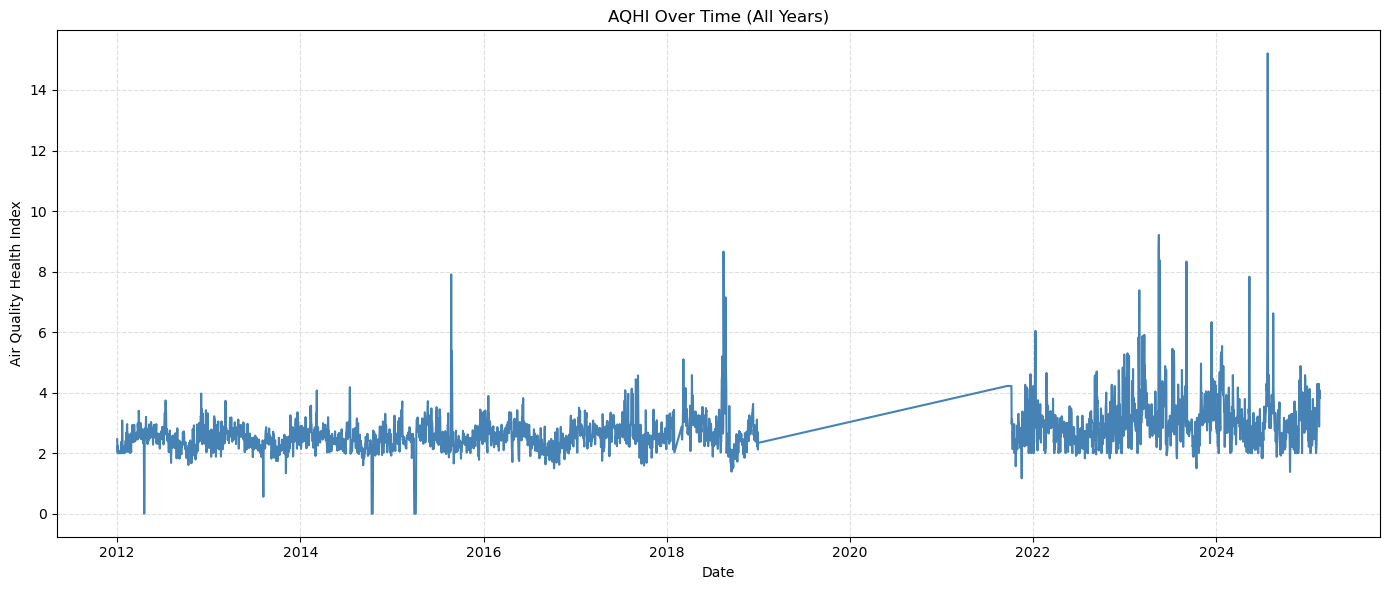

In [73]:
# Capturing seasonality across the years for parameter tuning beforehand:

import seaborn as sns

# sort by date to ensure proper plotting
calg_pivot = calg_pivot.sort_values('Date')

filtered_calg_pivot = calg_pivot[calg_pivot['Date'] >= '2012-01-01'].sort_values('Date')

plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_calg_pivot, x='Date', y='Air Quality Health Index', color='steelblue')

plt.title('AQHI Over Time (All Years)')
plt.xlabel('Date')
plt.ylabel('Air Quality Health Index')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [74]:
# Values for AQHI were found to be 0 ZERO, hence df starting from 1997 instead of 1980
calg_cent1997 = calg_pivot[calg_pivot['Date'] >= '1997-11-01'].copy()

In [75]:
# Adding temporal features (Day of month already added)
calg_cent1997['Month Num'] = calg_cent1997['Date'].dt.month.copy()
calg_cent1997['Is Weekend'] = calg_cent1997['Day'].apply(lambda x: 1 if x in (['Saturday','Sunday']) else 0).copy()

In [76]:
calg_cent1997 = calg_cent1997.set_index('Date')
calg_cent1997 = calg_cent1997.sort_index()
calg_cent1997 = calg_cent1997.asfreq('D')

In [77]:
calg_cent1997.columns

Index(['Air Quality Health Index', 'Carbon Monoxide', 'Nitrogen Dioxide',
       'Outdoor Temperature', 'Ozone', 'PM10 Mass', 'PM2.5 Mass',
       'Relative Humidity', 'Sulphur Dioxide', 'Wind Direction', 'Wind Speed',
       'Year', 'Month', 'Day', 'Day of Month', 'Month Num', 'Is Weekend'],
      dtype='object', name='Parameter')

In [78]:
calg_cent1997

Parameter,Air Quality Health Index,Carbon Monoxide,Nitrogen Dioxide,Outdoor Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Sulphur Dioxide,Wind Direction,Wind Speed,Year,Month,Day,Day of Month,Month Num,Is Weekend
Date,,,,,,,,,,,,,,,,,
1997-11-01,8.60,0.50,0.03,14.87,0.02,8.18,5.86,52.50,NaN,245.00,7.82,1997.0,November,Saturday,1.0,11.0,1.0
1997-11-02,9.60,1.32,0.04,14.87,0.00,16.23,8.31,52.50,NaN,245.00,7.82,1997.0,November,Sunday,2.0,11.0,1.0
1997-11-03,12.76,1.52,0.04,14.87,0.01,26.76,13.00,52.50,NaN,245.00,7.82,1997.0,November,Monday,3.0,11.0,0.0
1997-11-04,13.58,0.96,0.03,14.87,0.01,22.00,11.07,52.50,NaN,245.00,7.82,1997.0,November,Tuesday,4.0,11.0,0.0
1997-11-05,13.58,1.25,0.04,14.87,0.01,15.96,8.75,52.50,NaN,245.00,7.82,1997.0,November,Wednesday,5.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13,4.29,0.32,0.03,-13.86,0.02,0.00,20.95,95.38,NaN,149.45,5.80,2025.0,February,Thursday,13.0,2.0,0.0
2025-02-14,2.88,0.15,0.01,-19.08,0.03,0.00,8.26,89.59,NaN,66.33,8.50,2025.0,February,Friday,14.0,2.0,0.0
2025-02-15,3.71,0.31,0.02,-19.28,0.02,0.00,14.51,77.02,NaN,248.33,4.98,2025.0,February,Saturday,15.0,2.0,1.0


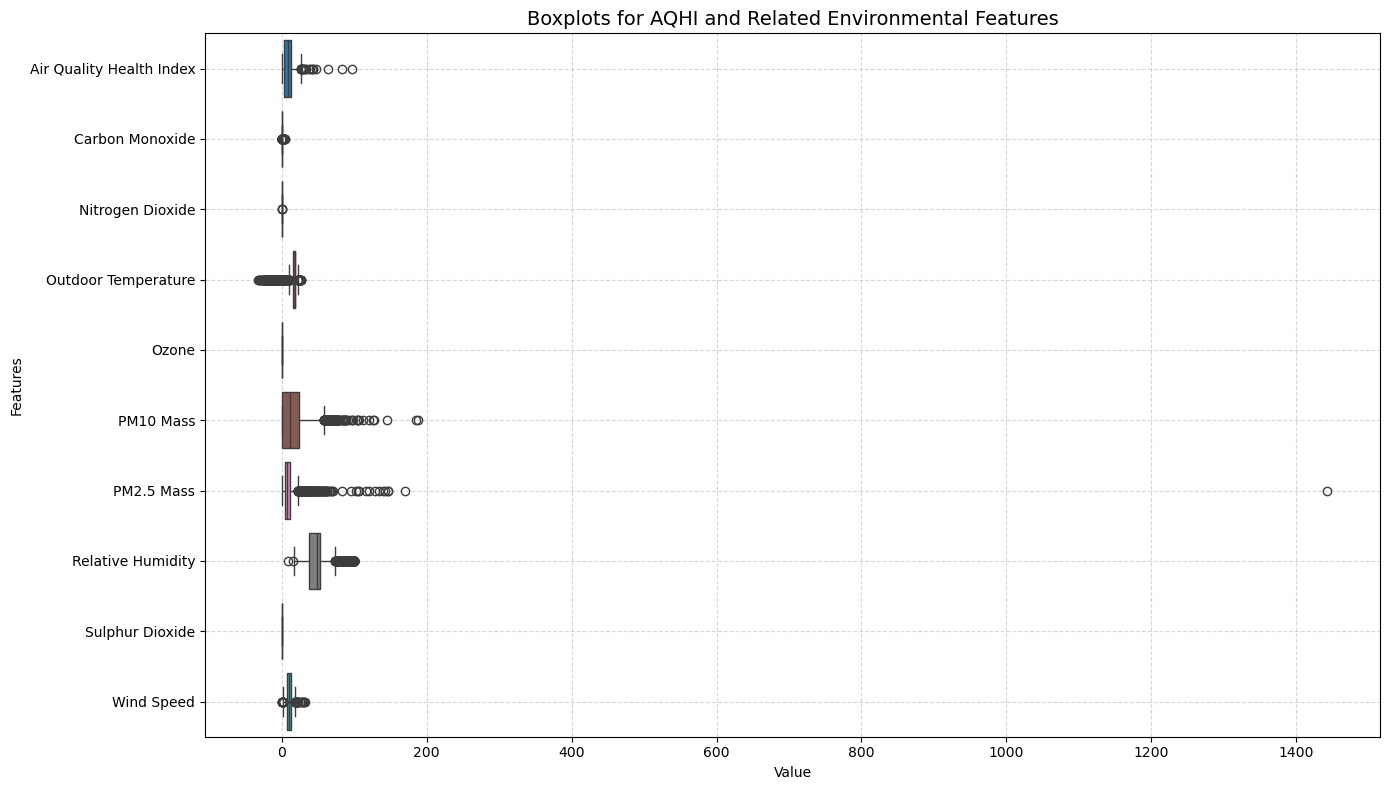

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
columns_to_plot = [
    'Air Quality Health Index', 'Carbon Monoxide', 'Nitrogen Dioxide',
    'Outdoor Temperature', 'Ozone', 'PM10 Mass', 'PM2.5 Mass',
    'Relative Humidity', 'Sulphur Dioxide', 'Wind Speed'
]

plt.figure(figsize=(14, 8))

sns.boxplot(data=calg_cent1997[columns_to_plot], orient='h', linewidth=1)

plt.title('Boxplots for AQHI and Related Environmental Features', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Features')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [80]:
# Finding outliers and replacing them with 90th Quartile. 

cols = ['Air Quality Health Index', 'Carbon Monoxide', 'Nitrogen Dioxide',
       'Outdoor Temperature', 'Ozone', 'PM10 Mass', 'PM2.5 Mass',
       'Relative Humidity', 'Sulphur Dioxide', 'Wind Speed']

for col in calg_cent1997[cols]:
    q90 = calg_cent1997[col].quantile(0.90)
    calg_cent1997[col] = np.where(calg_cent1997[col] > q90, q90, calg_cent1997[col])
    
calg_cent1997['Air Quality Health Index'].max()

15.79

In [81]:
calg_cent1997['Air Quality Health Index'].max()

15.79

In [82]:
calg_cent1997 = calg_cent1997.dropna(how='all')

In [83]:
calg_cent1997[calg_cent1997.isna().all(axis=1)]

Parameter,Air Quality Health Index,Carbon Monoxide,Nitrogen Dioxide,Outdoor Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Sulphur Dioxide,Wind Direction,Wind Speed,Year,Month,Day,Day of Month,Month Num,Is Weekend
Date,,,,,,,,,,,,,,,,,


In [84]:
print(calg_cent1997.index.duplicated().sum())

0


### We ran a gridsearch for the SARIMAX model's hyperparameters. It ran over 750 iterations to find the best values. 

C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 SARIMAX Feature Importance (by absolute coefficient size):
            Feature  Coefficient
              Ozone     0.094295
         PM2.5 Mass     0.091983
          PM10 Mass     0.039015
   Nitrogen Dioxide     0.023628
  Relative Humidity     0.023517
    Carbon Monoxide     0.021437
         Is Weekend     0.015080
         Wind Speed    -0.008334
          Month Num    -0.006507
Outdoor Temperature     0.001162
Validation MAE: 0.41348626421126344
Validation RMSE: 0.6100158910163505


C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


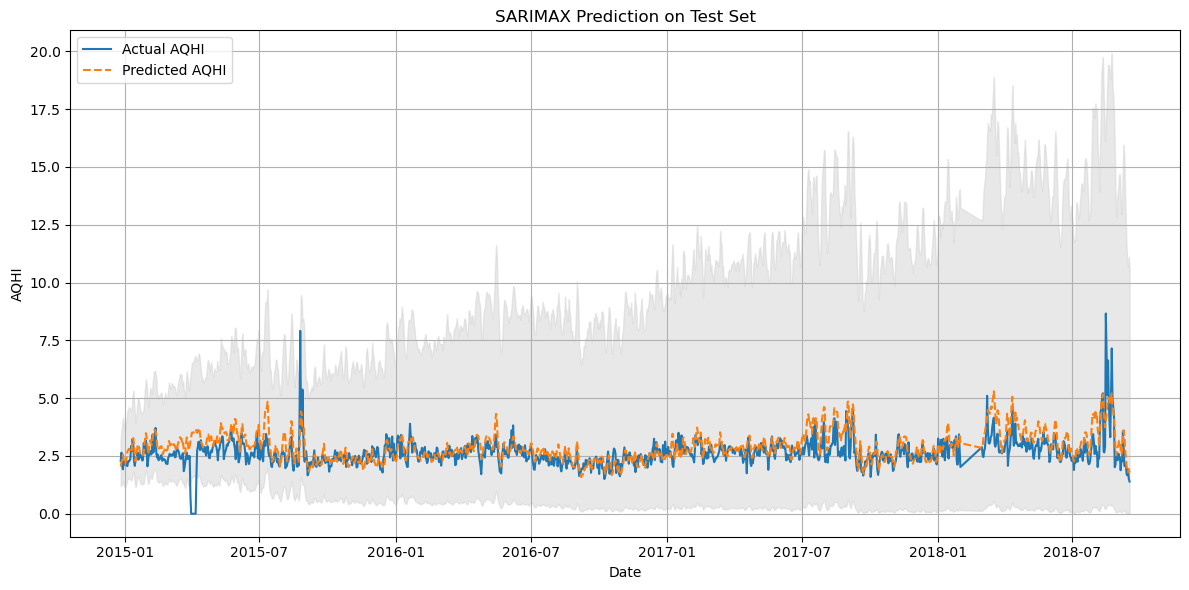

In [86]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

y = calg_cent1997['Air Quality Health Index']
#y = y.ffill().bfill()

features = ['Carbon Monoxide', 'Nitrogen Dioxide', 'Outdoor Temperature', 'Ozone',
                 'PM10 Mass', 'PM2.5 Mass', 'Relative Humidity', 'Wind Speed', 'Month Num', 'Is Weekend']

X = calg_cent1997[features]


# Define the date range to remove
start = '2019-01-01'
end = '2021-09-17'

# Drop the range from both target and features
X = X.drop(X.loc[start:end].index, errors='ignore')
y = y.drop(y.loc[start:end].index, errors='ignore')

total_len = len(calg_cent1997)
train_size = int(total_len * 0.70)
val_size = int(total_len * 0.15)
test_size = total_len - train_size - val_size


#Scale the exogenous variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X = X_scaled
X = X.rolling(window=3, min_periods=1).mean()

y = np.cbrt(y)

# Split data
y_train = y.iloc[:train_size]
y_val = y.iloc[train_size:train_size + val_size]
y_test = y.iloc[train_size + val_size:]

X_train = X.iloc[:train_size]
X_val = X.iloc[train_size:train_size + val_size]
X_test = X.iloc[train_size + val_size:]

model = SARIMAX(
    endog=y_train,
    exog=X_train,
    order=(4, 1, 2),
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=True,
    enforce_invertibility=False
)
result = model.fit()

exog_names = result.model.exog_names 

# Extract the coefficients
exog_coefs = [result.params[name] for name in exog_names]

feature_importance_val = pd.DataFrame({
    'Feature': exog_names,
    'Coefficient': exog_coefs,
    'Abs_Coefficient': np.abs(exog_coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print("\n SARIMAX Feature Importance (by absolute coefficient size):")
print(feature_importance_val[['Feature', 'Coefficient']].to_string(index=False))

# 2. Predict on validation
val_pred = result.get_prediction(start=len(y_train), end=len(y_train) + len(y_val) - 1, exog=X_val)
val_pred_log = val_pred.predicted_mean
conf_int_log_val = val_pred.conf_int()

val_pred = val_pred_log ** 3
val_test_actual = y_val ** 3

# Inverse cube root for confidence intervals
conf_int_val = conf_int_log_val.copy()
conf_int_val.iloc[:, 0] = conf_int_val.iloc[:, 0] ** 3
conf_int_val.iloc[:, 1] = conf_int_val.iloc[:, 1] ** 3

val_pred.index = val_test_actual.index

conf_int_val.index = val_test_actual.index

val_mae = mean_absolute_error(val_test_actual, val_pred)
val_rmse = np.sqrt(mean_squared_error(val_test_actual, val_pred))
print("Validation MAE:", val_mae)
print("Validation RMSE:", val_rmse)

plt.figure(figsize=(12, 6))
plt.plot(val_test_actual, label='Actual AQHI')
plt.plot(val_pred, label='Predicted AQHI', linestyle='--')
plt.fill_between(val_pred.index,
                 conf_int_val.iloc[:, 0],
                 conf_int_val.iloc[:, 1], color='lightgray', alpha=0.5)
plt.title("SARIMAX Prediction on Test Set")
plt.xlabel("Date")
plt.ylabel("AQHI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 SARIMAX Feature Importance (by absolute coefficient size):
            Feature  Coefficient
              Ozone     0.086593
         PM2.5 Mass     0.080431
          PM10 Mass     0.040877
   Nitrogen Dioxide     0.027515
    Carbon Monoxide     0.026395
  Relative Humidity     0.014459
         Is Weekend     0.013603
         Wind Speed    -0.010756
          Month Num    -0.004986
Outdoor Temperature    -0.003297

Test MAE: 0.55
Test RMSE: 0.81


C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saadu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


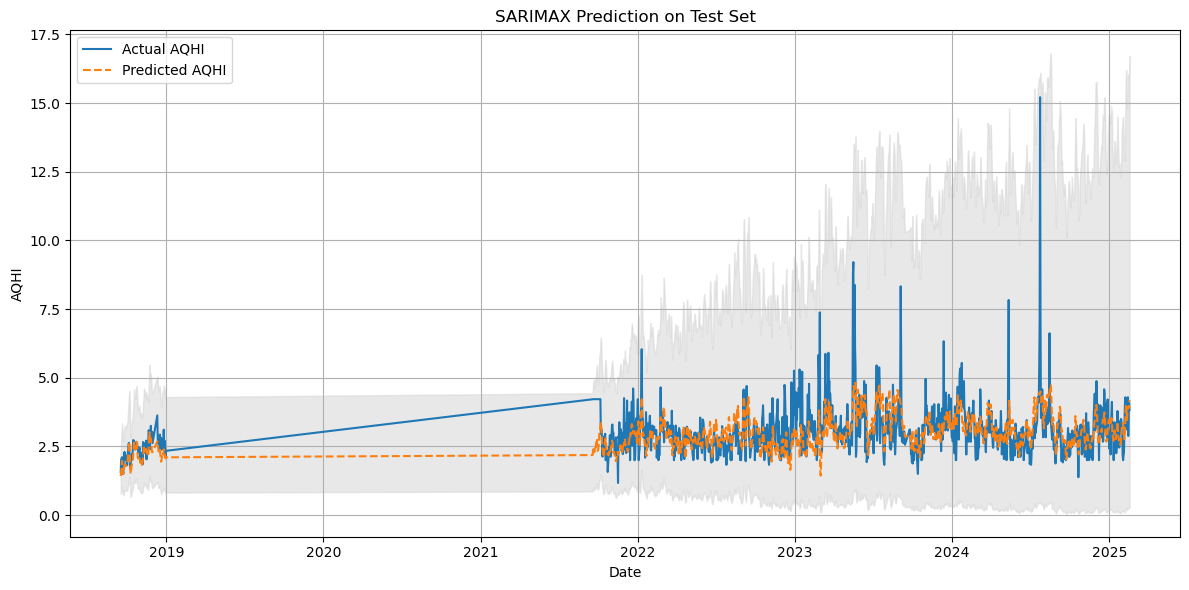


--- AQHI Prediction vs Actual (Test Set) ---
            Actual AQHI  Predicted AQHI Risk Level
Date                                              
2018-09-17         1.57            1.42   Low risk
2018-09-18         2.02            1.56   Low risk
2018-09-19         2.07            1.80   Low risk
2018-09-20         2.11            1.97   Low risk
2018-09-21         1.50            1.81   Low risk
2018-09-22         1.64            1.58   Low risk
2018-09-23         1.53            1.49   Low risk
2018-09-24         2.03            1.61   Low risk
2018-09-25         2.20            1.76   Low risk
2018-09-26         2.30            1.84   Low risk
2018-09-27         2.02            1.83   Low risk
2018-09-28         2.05            1.81   Low risk
2018-09-29         2.08            1.80   Low risk
2018-09-30         2.16            1.84   Low risk
2018-10-01         1.81            1.84   Low risk
2018-10-02         2.03            1.85   Low risk
2018-10-03         2.18            1

In [87]:
# Combine train and val for final training before test prediction
y_trainval = pd.concat([y_train, y_val])
X_trainval = pd.concat([X_train, X_val])

model = SARIMAX(
    endog=y_trainval,
    exog=X_trainval,
    order=(4, 1, 2), 
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=True,
    enforce_invertibility=False
)
results = model.fit(disp=False)

exog_names = results.model.exog_names 

exog_coefs = [results.params[name] for name in exog_names]

feature_importance_df = pd.DataFrame({
    'Feature': exog_names,
    'Coefficient': exog_coefs,
    'Abs_Coefficient': np.abs(exog_coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print("\n SARIMAX Feature Importance (by absolute coefficient size):")
print(feature_importance_df[['Feature', 'Coefficient']].to_string(index=False))

test_start_idx = len(y_trainval)
test_end_idx = test_start_idx + len(y_test) - 1

forecast = results.get_prediction(start=test_start_idx, end=test_end_idx, exog=X_test, dynamic=False)
y_pred_log = forecast.predicted_mean
conf_int_log = forecast.conf_int()

y_pred = y_pred_log ** 3
y_test_actual = y_test ** 3

# Inverse cube root for confidence intervals
conf_int = conf_int_log.copy()
conf_int.iloc[:, 0] = conf_int.iloc[:, 0] ** 3
conf_int.iloc[:, 1] = conf_int.iloc[:, 1] ** 3

y_pred.index = y_test.index

conf_int.index = y_test.index

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"\nTest MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual AQHI')
plt.plot(y_pred, label='Predicted AQHI', linestyle='--')
plt.fill_between(y_pred.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='lightgray', alpha=0.5)
plt.title("SARIMAX Prediction on Test Set")
plt.xlabel("Date")
plt.ylabel("AQHI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Risk level classification
def classify_aqhi_risk(aqhi):
    if aqhi <= 4:
        return "Low risk"
    elif 4 <= aqhi <= 6:
        return "Moderate risk"
    else:
        return "High risk"

risk_levels = y_pred.apply(classify_aqhi_risk)

# Results DataFrame
results_df = pd.DataFrame({
    'Actual AQHI': y_test_actual,
    'Predicted AQHI': y_pred.round(2),
    'Risk Level': risk_levels
})

print("\n--- AQHI Prediction vs Actual (Test Set) ---")
print(results_df.head(40))

In [163]:
results_df['Difference'] = results_df['Predicted AQHI'] - results_df['Actual AQHI']

In [164]:
results_df[(results_df['Difference'] > 0.8) | (results_df['Difference'] < -0.8)]

,Actual AQHI,Predicted AQHI,Risk Level,Difference
Date,,,,
2022-09-03,4.43,3.43,Low risk,-1.00
2022-09-05,3.17,4.05,Moderate risk,0.88
2022-09-10,4.48,2.48,Low risk,-2.00
2022-09-11,4.70,3.18,Low risk,-1.52
2022-09-30,2.00,2.85,Low risk,0.85
...,...,...,...,...
2025-01-04,2.21,3.23,Low risk,1.02
2025-02-02,2.00,3.03,Low risk,1.03
2025-02-06,3.92,2.83,Low risk,-1.09


### Save the model and create gui

In [91]:
import joblib
import os

save_path = r"E:\Projects\Data\Air quality\Models"

os.makedirs(save_path, exist_ok=True)

joblib.dump(results, os.path.join(save_path, "sarimax_model.pkl"))

joblib.dump(scaler, os.path.join(save_path, "x_scaler.pkl"))



['E:\\Projects\\Data\\Air quality\\Models\\x_scaler.pkl']